In [17]:
import pandas as pd
import numpy as np
from sargas import *
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
rc = 3.0
n = 500
rho = 0.9
dt = 0.005
f = 20
t_init = 0.851

potential = Potential.lennard_jones(1.0, 1.0, rc, True)
system = System(Configuration.lattice(n, rho, initial_temperature=t_init), potential)
velocity_verlet = Integrator.velocity_verlet(dt)
md = MolecularDynamics(velocity_verlet, Thermostat.velocity_rescaling(t_init))
simulation = Simulation.molecular_dynamics(system, md, 1000)
simulation.run(10_000)

In [25]:
props = Observer.properties(f)
simulation.add_observer(props)
simulation.run(20_000)

In [26]:
%%time
simulation.run(5_000)

CPU times: user 5.27 s, sys: 0 ns, total: 5.27 s
Wall time: 5.26 s


In [27]:
results = pd.DataFrame(props.data)
results['time'] = results.index * dt * f
results['temperature'] = 2 / 3 * results.kinetic_energy / 500
results.head()

,pressure,potential_energy,virial,kinetic_energy,total_energy,time,temperature
0,1.337705,-3133.270313,3066.500494,665.160286,-2468.110026,0.0,0.886880
1,1.571923,-3108.343243,3456.863239,640.157862,-2468.185381,0.1,0.853544
2,1.681016,-3103.905858,3638.685641,635.603152,-2468.302706,0.2,0.847471
3,1.395389,-3131.236099,3162.639607,662.815419,-2468.420680,0.3,0.883754
4,1.692318,-3096.791190,3657.522601,628.651847,-2468.139344,0.4,0.838202


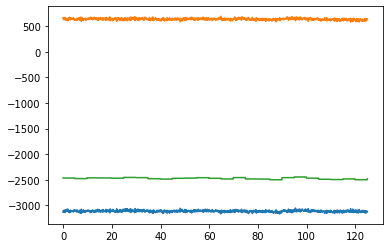

In [28]:
plt.plot(results.time, results.potential_energy)
plt.plot(results.time, results.kinetic_energy)
plt.plot(results.time, results.total_energy)
#plt.xlim(100, 200)

In [29]:
results.total_energy.values[::10].mean() / 500

-4.951158568621746

In [30]:
results.kinetic_energy.values[::10].mean() / 500

1.2789860120553984

In [31]:
results.potential_energy.values[::10].mean() / 500

-6.230144580677145

In [13]:
results.pressure.values[::10].mean() + rho * t_init

3.23294118790949